# The Loan Application Status Prediction

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Loan Application Status Dataset

Loan Application Status Prediction is a machine learning project aimed at predicting whether a loan application should be approved or denied based on various features and data points associated with the applicants. The goal is to assist financial institutions, such as banks or lending companies, in automating the loan approval process, making it more efficient and objective.The dataset used in this project contains information about individuals who have applied for loans.https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv.

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Loading the Loan Application  Status Dataset](#Loading-the-Loan-Application-Status-Dataset)
3. [Exploring The Dataset](#Exploring-The-Dataset)
4. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
5. [Feature Engineering and Description of Dataset](#Feature-Engineering-and-Description-of-Dataset)
6. [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
7. [Splitting the Data](#Splitting-the-Data)
8.  [The Machine Learning Model Training Evaluation and Predictions](#The-Machine-Learning-Model-Training-Evaluation-and-Predictions)

# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import joblib
from sklearn.metrics import plot_roc_curve

#  Loading the Loan Application  Status Dataset

In [2]:
url = "https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv"
df = pd.read_csv(url)

In [3]:
# Exploring the data
df.head(15)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df.tail(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
585,LP002912,Male,Yes,1,Graduate,No,4283,3000.0,172.0,84.0,1.0,Rural,N
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
588,LP002925,NaN,No,0,Graduate,No,4750,0.0,94.0,360.0,1.0,Semiurban,Y
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
591,LP002931,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,240.0,1.0,Semiurban,N
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y
593,LP002936,Male,Yes,0,Graduate,No,3859,3300.0,142.0,180.0,1.0,Rural,Y


In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploring The Dataset

Analyzing the dataset's structure, identify any missing values, and examine basic statistical information.

In [6]:
# Displaying the first few rows of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#Checking the dimension of the dataset
df.shape

(614, 13)

The dataset consists of 614 rows and 13 columns. One column is assigned as the target variable, while the other 12 columns act as independent variables.

**Description of the Loan Application Status Prediction**:
    
**Objective**    
    
The goal of this project on predicting the status of loan applications is to develop a machine learning model capable of determining the approval or rejection of a loan application based on diverse applicant information.

**Independent Variables**:

1. **Loan_ID**: Unique identifier for each loan application.
2. **Gender**: Applicant's gender (male or female).
3. **Married**: Marital status of the applicant (married or not married).
4. **Dependents**: Number of dependents on the applicant for survival.
5. **Education**: Applicant's level of education (graduate or not graduate).
6. **Self_Employed**: Employment status of the applicant (self-employed or not self-employed).
7. **Applicant Income**: Disposable income available for the applicant's use.
8. **Coapplicant Income**: Disposable income available for people participating in the loan application process alongside the main applicant.
9. **Loan Amount**: The amount of money the applicant owes at any given time.
10. **Loan Amount** Term: Duration in which the loan is availed to the applicant.
11. **Credit History**: Record of the applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. **Property Area**: The total area within the boundaries of the property.

**Dependent Variable**:

**Loan_Status**: Whether the loan application is approved or not (binary outcome: Y or N).

**Approach**

The project involves exploring the relationships between the independent variables and the dependent variable (Loan_Status) by means of data cleaning, preprocessing, and exploratory data analysis. Subsequently, machine learning models, such as a Random Forest Classifier,Decision Tree, KNN  are trained on a subset of the dataset to anticipate loan approval status. The model's effectiveness is assessed using a distinct test set, and its performance metrics, including accuracy, confusion matrix, and classification report are examined.Also, hyperparameter tuning will be conducted to enhance the model's performance.

**Insights**

The Insights gained from this models have the potential to assist financial institutions in automating the initial phases of the loan approval processess, thereby enhancing efficiency and potentially mitigating the risk of human bias during decision-making.

In [8]:
# Lets check the null values 
print(df.isnull().sum())
print(df.shape)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
(614, 13)


There are missing/Null values in the Data Set

Missing values have now been removed

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There Three(3) different types of data(object,int64 and float64) present in the dataset i.e. eight(8) objects and five(5) numerical columns.

In [10]:
# Exploring the basic statistics
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Data Cleaning and Preprocessing

It is essential to address missing values and employ encoding techniques for categorical variables in order to ensure accurate analysis and interpretation.

In [11]:
# Handling missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [12]:
print(df.isnull().sum())
print(df.shape)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
(614, 13)


There are no more missing values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
# Lets check the dimension of the dataset again
df.shape

(614, 13)

<AxesSubplot:>

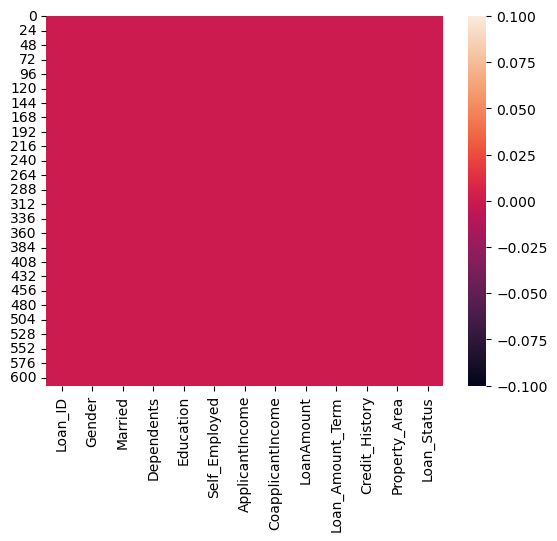

In [15]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [16]:
# Checking the columns of dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
df.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [18]:
# Separating numerical and categorical columns

#checking for categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Checking for Numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [19]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


This are the unique values present in the dataset.Here The Loan_ID column has the data of unique Value which can be dropped.

In [20]:
# Dropping Loan_ID column
df.drop("Loan_ID", axis = 1, inplace = True)

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
# Checking the list of counts of target
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

These are the two categories present in the target column namely "Yes" and "No"

In [23]:
# Checking the unique values in target column
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

We can assume "Yes" if the loan application is approved and "No" if the application is not approved.

# Feature Engineering and Description of Dataset

In [24]:
# Creating new feature by Combining ApplicantIncome and CoapplicantIncome into a new feature TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [25]:
# Statistical summary of numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049,7024.705081
std,6109.041673,2926.248369,84.180967,64.428629,0.352339,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


**This gives statistical information of the numerical columns.The summary of the dataset looks perfect since there is no negative/invalid values present.**

from the above description, we can observe the following-:
1. The counts of all the columns are the same which means there are no missing values in the dataset.
2. The mean value is greater than the median(50%) in the LoanAmount and totalIncome column which means the data is skewed to right in these columns.
3. The data in the LoanAmountTerm and CreditHistory column have mean values less than median which means the data is skewed to left.
4. In summary,we can observe that there is a huge differences between 75% and max except for the CreditHistory column.hence there are outliers present in the data.
5. We equally notice the Standard deviation(SD),min,25% percentile from this describe method. 

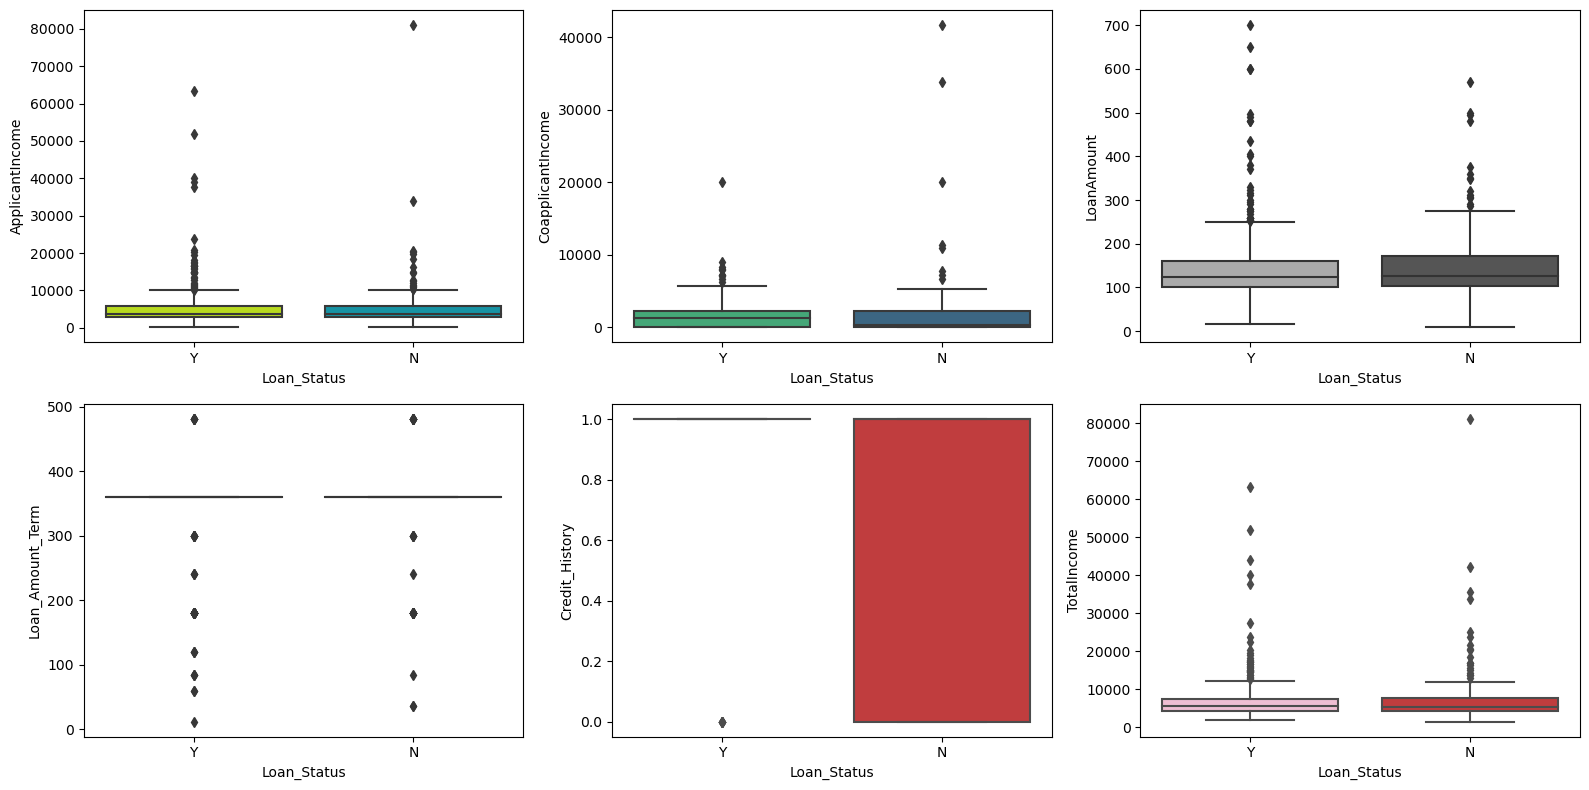

In [26]:
# visualizing the Numerical features
fig, axss = plt.subplots(2,3, figsize=[16,8])
sns.boxplot(x='Loan_Status', y ='ApplicantIncome', data=df, ax=axss[0][0],palette="nipy_spectral_r")
sns.boxplot(x='Loan_Status', y ='CoapplicantIncome', data=df, ax=axss[0][1],palette="viridis_r")
sns.boxplot(x='Loan_Status', y ='LoanAmount', data=df, ax=axss[0][2],palette="gist_gray_r")
sns.boxplot(x='Loan_Status', y ='Loan_Amount_Term', data=df, ax=axss[1][0],palette="plasma_r")
sns.boxplot(x='Loan_Status', y ='Credit_History', data=df, ax=axss[1][1],palette="tab20_r")
sns.boxplot(x='Loan_Status', y ='TotalIncome', data=df, ax=axss[1][2],palette="tab20_r")
plt.tight_layout()
plt.savefig('numerical_dist.png');

# Exploratory Data Analysis (EDA)

Performing exploratory data analysis to understand the relationships between the variables.

Univariate analysis

Y    422
N    192
Name: Loan_Status, dtype: int64


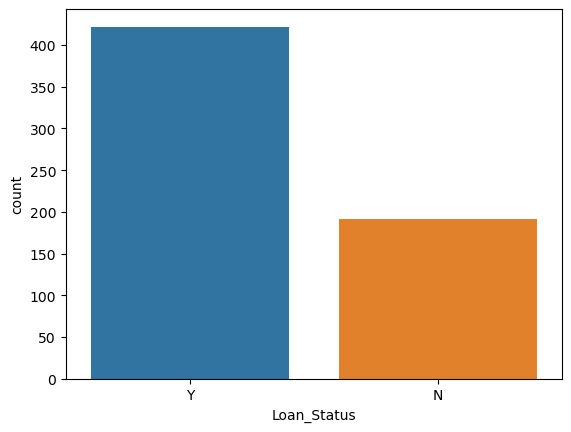

In [27]:
# Visualizing the count of Target variable
ax = sns.countplot(x='Loan_Status', data=df)
print(df['Loan_Status'].value_counts())

We can observe that the count of "Yes Loan_Status" are higher compared to that of "No Loand_Status" i.e.there are more number of customers whose Loans have been approved than those that has not been approved.this leads to CLASS IMBALANCE issue in the data.we will rectify it by using OVERSAMPLING METHOD later as we proceed. 

Male      502
Female    112
Name: Gender, dtype: int64


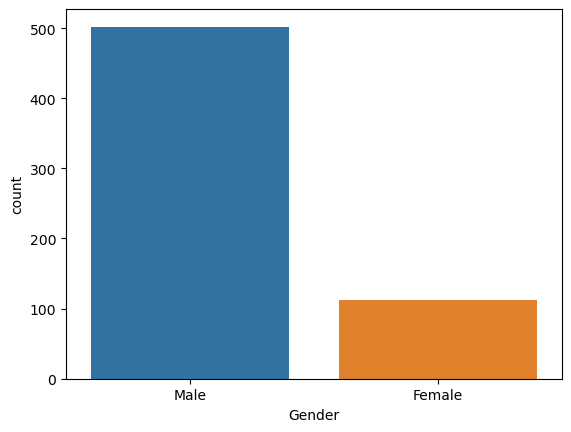

In [28]:
# Visualizing the count of Applicants Gender
print(df['Gender'].value_counts())
ax = sns.countplot(x='Gender', data=df)
plt.show()

Based on the plot, it is evident that the number of males greatly exceeds the number of females.

Yes    401
No     213
Name: Married, dtype: int64


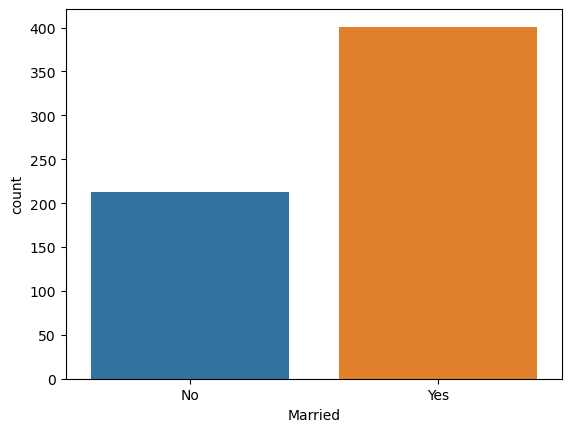

In [29]:
# Visualizing the count of Marital Status of Applicants
print(df['Married'].value_counts())
ax = sns.countplot(x='Married', data=df)
plt.show()

Here, the number of married applicants are higher than those not married. 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


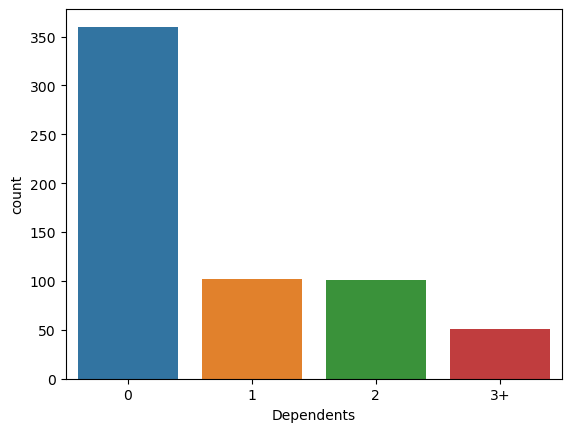

In [30]:
# Visualizing the count of level of Dependents on applicants for survival
print(df['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', data=df)
plt.show()

The number of applicants with "0" dependents greatly exceeds the number of those with 1, 2 Or 3 dependents and above.i.e majority of the applicants have "0" dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


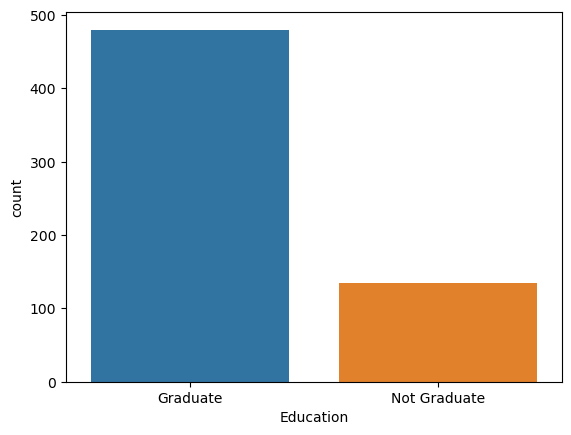

In [31]:
# Visualizing the count of applicants level of education
print(df['Education'].value_counts())
ax = sns.countplot(x='Education', data=df)
plt.show()

The number of Graduate Applicants is higher than that of the Non-Graduates.

No     532
Yes     82
Name: Self_Employed, dtype: int64


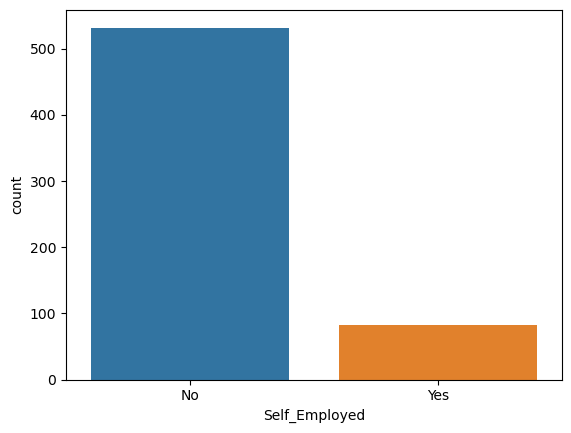

In [32]:
# Visualizing the count of Employment Status of the Applicants
print(df['Self_Employed'].value_counts())
ax = sns.countplot(x='Self_Employed', data=df)
plt.show()

Here, The Status of those Applicants not in employment are greater that are self employed.

<AxesSubplot:xlabel='Gender', ylabel='count'>

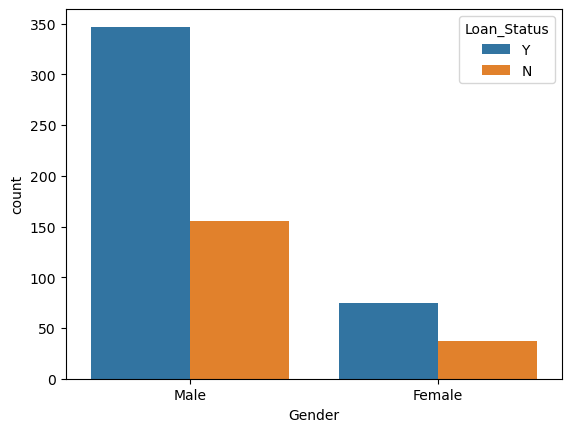

In [33]:
# Visualizing the distribution of Loan_Status based on Gender
sns.countplot(x='Gender', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

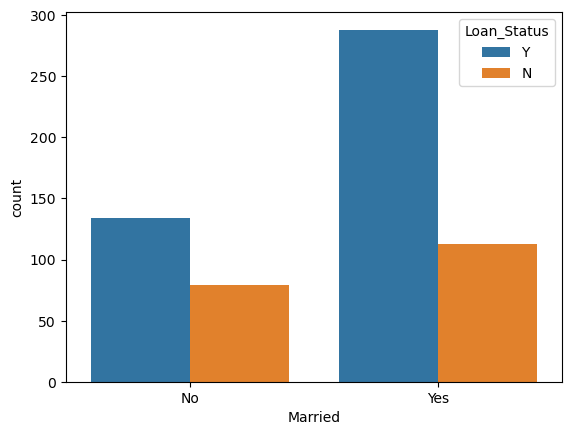

In [34]:
# Visualizing the distribution of Loan_Status based on Married
sns.countplot(x='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

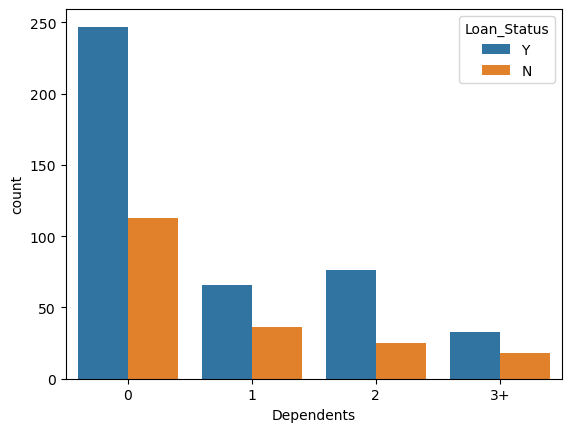

In [35]:
# Visualizing the distribution of Loan Status and No.dependents living on the applicant for survival
sns.countplot(x='Dependents', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

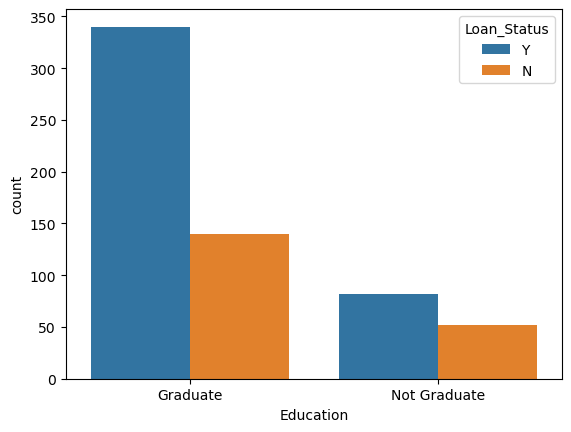

In [36]:
# Visualizing the distribution of Loan Status and Applicant's level of education
sns.countplot(x='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

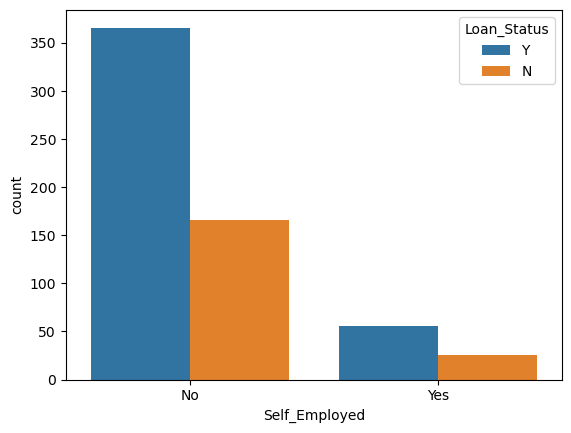

In [37]:
# Visualizing the distribution of Loan_Status based on Employment status of the applicant
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)

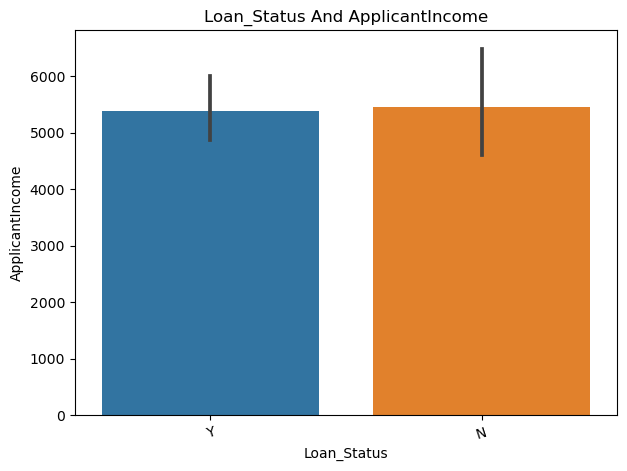

In [38]:
# Visualizing the distribution of Loan_Status based on the Disposable income available for the applicant's use
plt.figure(figsize=(7,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status And ApplicantIncome")
plt.xticks(rotation=18)
plt.show()

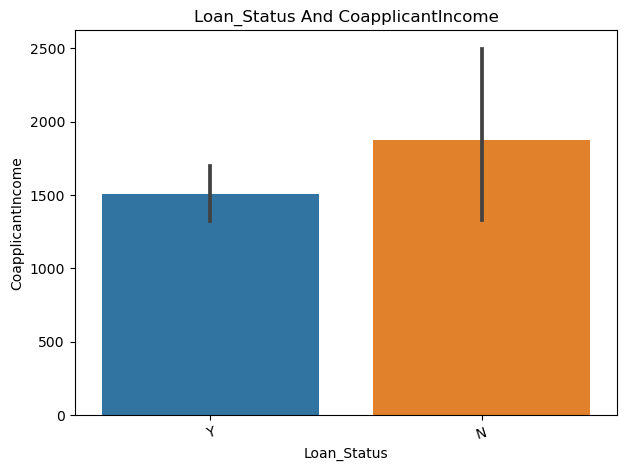

In [39]:
# Visualizing the distribution of Loan_Status based on the Disposable income of other participants.
plt.figure(figsize=(7,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status And CoapplicantIncome")
plt.xticks(rotation=18)
plt.show()

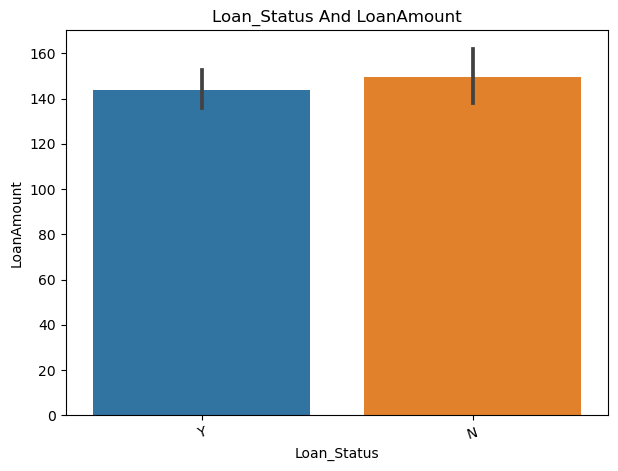

In [40]:
# Visualizing the distribution of Loan Status With the amount of money an applicant owes at any given time.
plt.figure(figsize=(7,5))
sns.barplot(y='LoanAmount',x='Loan_Status',data=df)
plt.title("Loan_Status And LoanAmount")
plt.xticks(rotation=18)
plt.show()

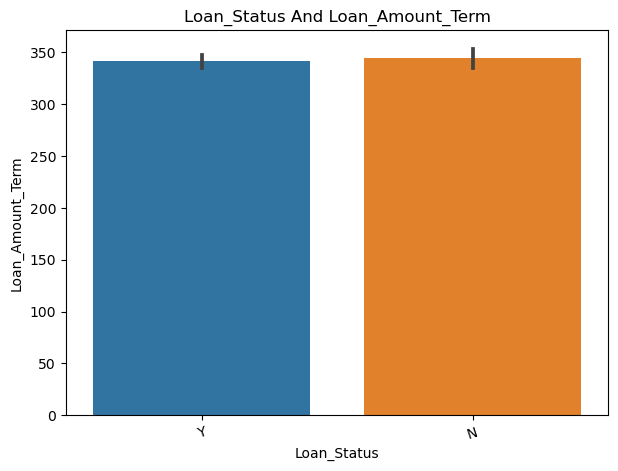

In [41]:
# Visualizing the distribution of Loan Status With the Duration in which the loan is availed to the applicant.
plt.figure(figsize=(7,5))
sns.barplot(y='Loan_Amount_Term',x='Loan_Status',data=df)
plt.title("Loan_Status And Loan_Amount_Term")
plt.xticks(rotation=18)
plt.show()

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

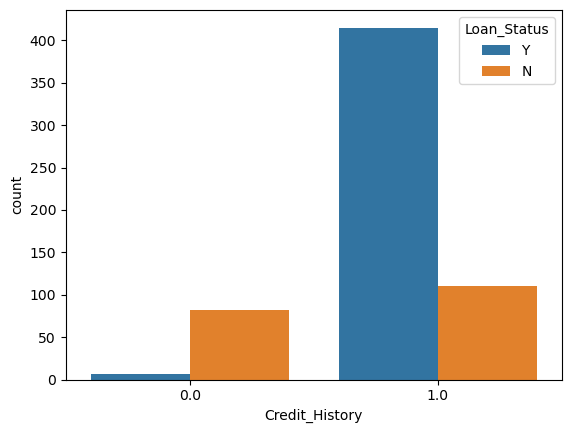

In [42]:
# Visualizing the distribution of Loan_Status based on Credit_History
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

This finding provides additional evidence that loans can be granted to individuals with a favorable credit history.

In [43]:
# Let's explore further
df.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True,dropna=False)

Credit_History  Loan_Status
0.0             N              0.921348
                Y              0.078652
1.0             Y              0.790476
                N              0.209524
Name: Loan_Status, dtype: float64

It can be observed that If an applicant has a credit history, there is an 80% likelihood that his/her loan application will be approved. Conversely, if the applicant does not have a credit history, there is a 92% probability that the loan application will be rejected.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

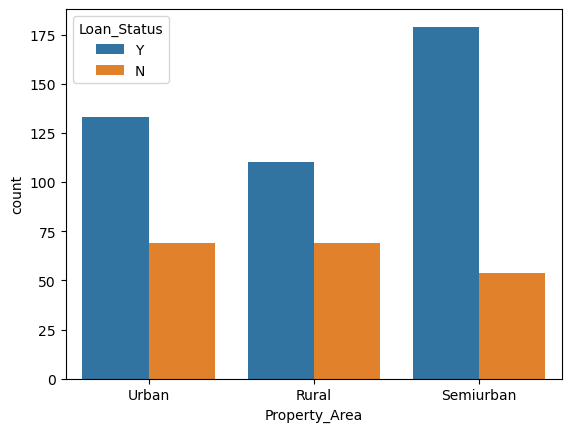

In [44]:
# Visualizing the distribution of Loan Status and The total area within the boundaries of the property.
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)

**Multivariate Analysis**

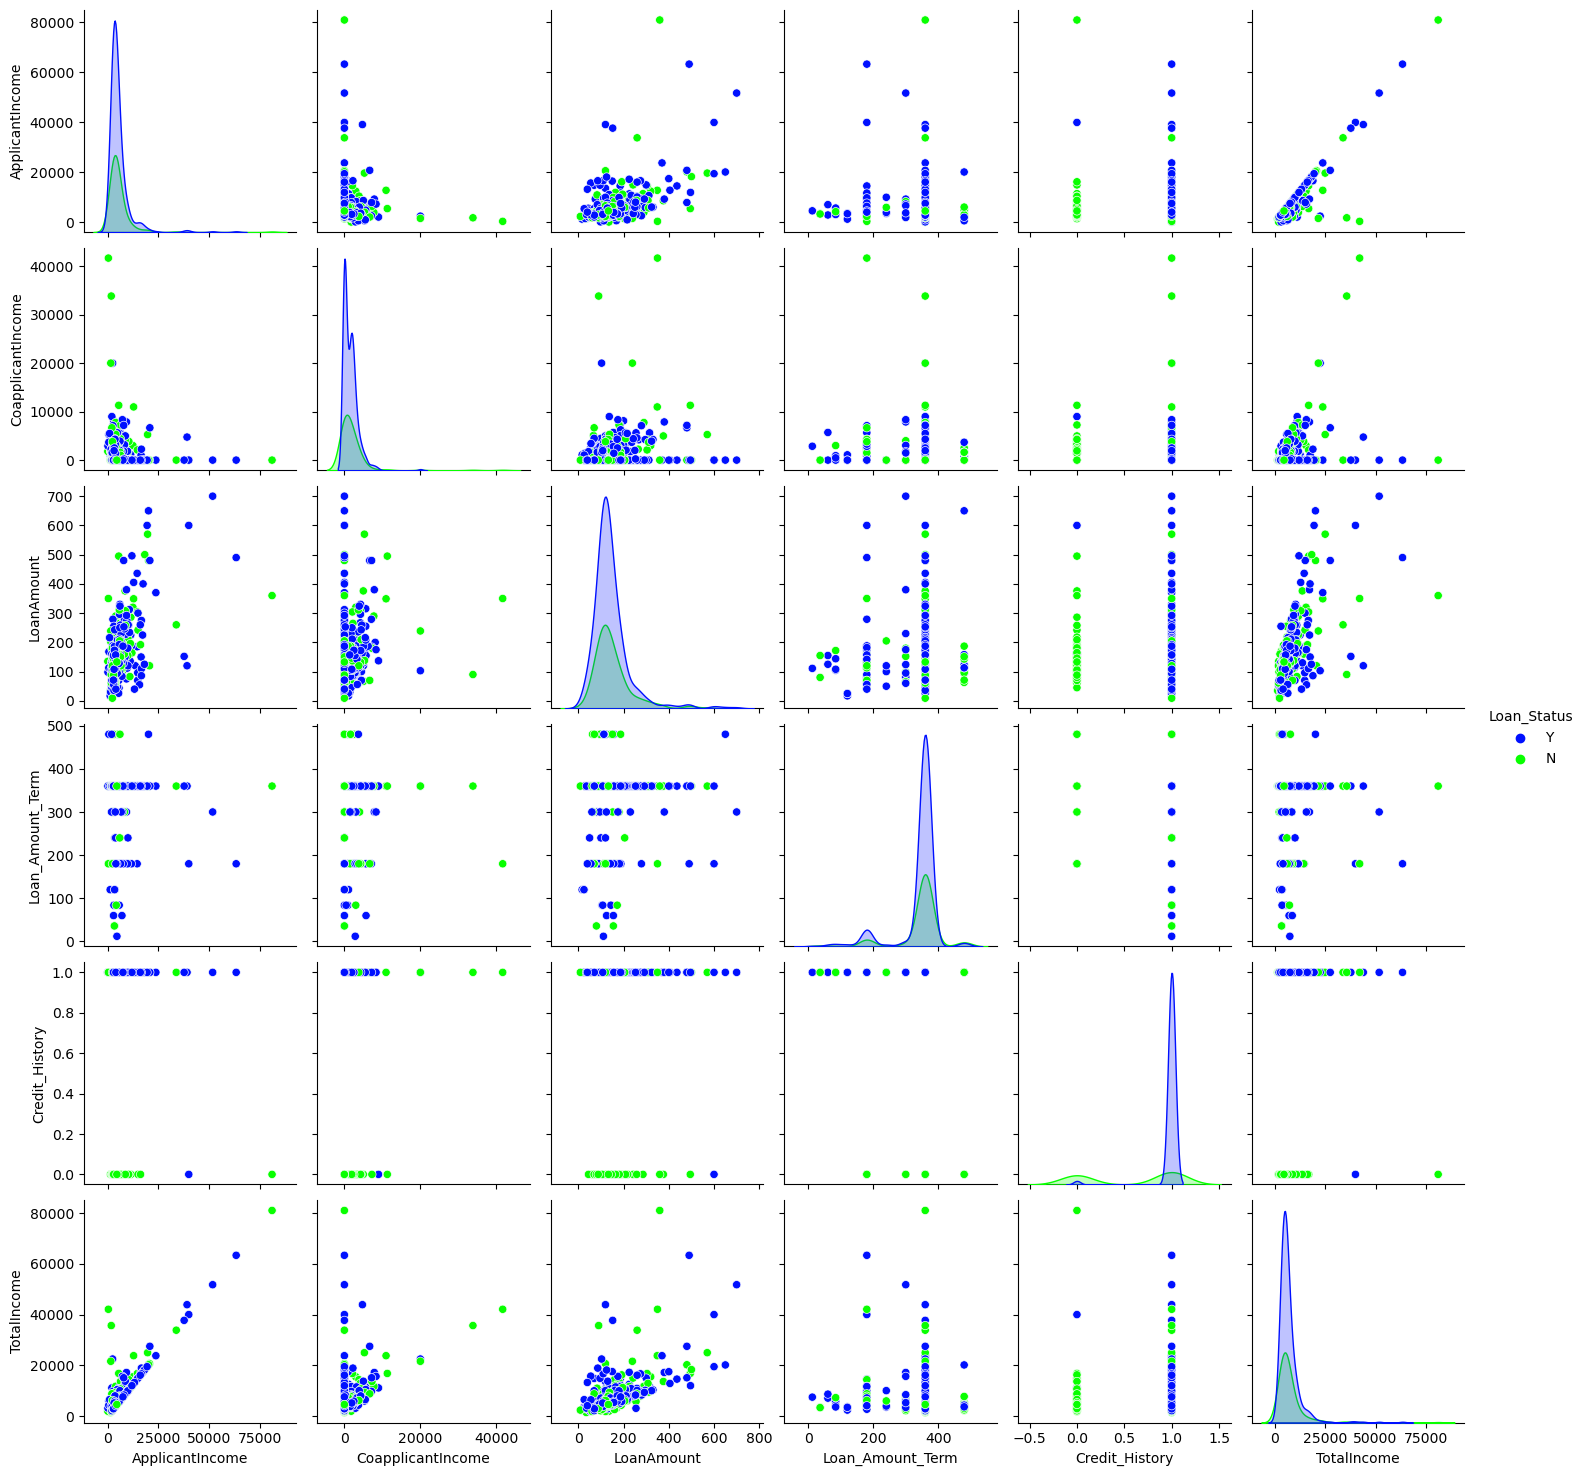

In [45]:
sns.pairplot(df, hue = "Loan_Status", palette = "hsv_r")
plt.show()

1. The pairplot gives the pairwise relation between the features on the basis of the target "Loan_Status".As we can see the distribution plot On the diagonal Side of the plot.
2. Also,There are no indicated outliers in any of the columns.

We shall plot the box plot so as to identify this outliers if any.

**Checking for Outliers**

In [46]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

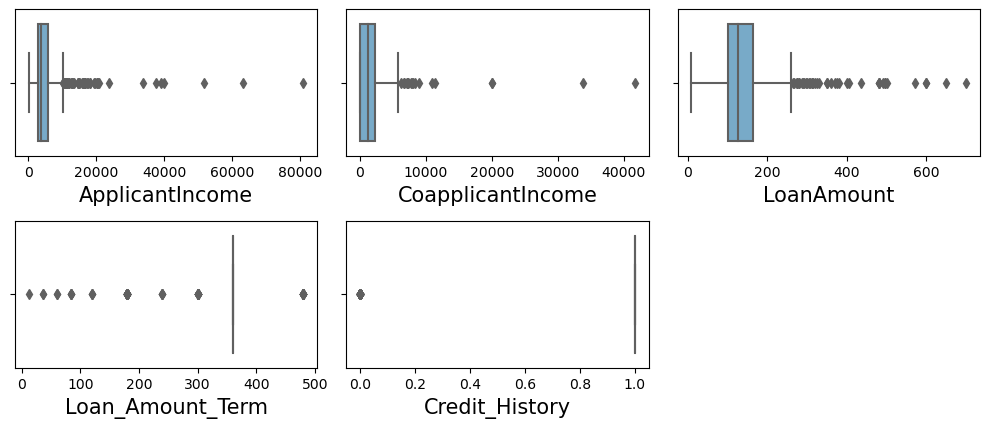

In [47]:
# Lets check the Outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=6:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[col], palette = "Blues")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

The Column Loan_Amount_Trem And Credit_History has Outliers but it contains categorical data so no need to remove outliers.Apart from this none of the columns have outliers. 

**Checking for Skewness**

In [48]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
TotalIncome          5.633449
dtype: float64

The skewness values of the above numerical variables suggest that their distributions are either right-skewed or left-skewed. ApplicantIncome, CoapplicantIncome, LoanAmount, and TotalIncome have positive skewness, indicating a right-skewed distribution. On the other hand, Loan_Amount_Term and Credit_History have negative skewness, indicating a left-skewed distribution.

**Removing Skewness**

In [49]:
# # Logging transformation for positively skewness 
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])
df['Loan_Amount_Term'] = np.log1p(df['Loan_Amount_Term'])
df['Credit_History'] = np.log1p(df['Credit_History'])
df['TotalIncome'] = np.log1p(df['TotalIncome'])

In [50]:
# Checking skewness again
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.137460
Loan_Amount_Term    -4.801527
Credit_History      -2.021971
TotalIncome          1.077048
dtype: float64

**Encoding Categorical Columns**

In [51]:
# Encode categorical variables
label_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,8.674197,0.000000,4.795791,5.888878,0.693147,2,1,8.674197
1,1,1,1,0,0,8.430327,7.319202,4.859812,5.888878,0.693147,0,0,8.714732
2,1,1,0,0,1,8.006701,0.000000,4.204693,5.888878,0.693147,2,1,8.006701
3,1,1,0,1,0,7.857094,7.765993,4.795791,5.888878,0.693147,2,1,8.505525
4,1,0,0,0,0,8.699681,0.000000,4.955827,5.888878,0.693147,2,1,8.699681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,5.888878,0.693147,0,1,7.972811
610,1,1,3,0,0,8.320448,0.000000,3.713572,5.198497,0.693147,0,1,8.320448
611,1,1,1,0,0,8.996280,5.484797,5.537334,5.888878,0.693147,2,1,9.025576
612,1,1,2,0,0,8.933796,0.000000,5.236442,5.888878,0.693147,2,1,8.933796


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
 12  TotalIncome        614 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 45.7 KB


The categorical columns have been transformed into numerical columns using the Ordinal Encoding technique.

In [53]:
# Statistical Summary of numerical
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,8.341510,4.290129,4.863797,5.806547,0.592675,1.037459,0.687296,8.669608
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.645035,3.875873,0.490984,0.309785,0.244223,0.787482,0.463973,0.545017
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.017280,0.000000,2.302585,2.564949,0.000000,0.000000,0.000000,7.274480
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.965024,0.000000,4.617584,5.888878,0.693147,0.000000,0.000000,8.334952
50%,1.000000,1.000000,0.000000,0.000000,0.000000,8.246303,7.081125,4.836282,5.888878,0.693147,1.000000,1.000000,8.597390
75%,1.000000,1.000000,1.000000,0.000000,0.000000,8.664922,7.739897,5.110477,5.888878,0.693147,2.000000,1.000000,8.925682
max,1.000000,1.000000,3.000000,1.000000,1.000000,11.302217,10.637489,6.552508,6.175867,0.693147,2.000000,1.000000,11.302217


After performing encoding on the categorical columns, comprehensive details of each column can be observed. The counts of all columns are identical, indicating the absence of null values in the dataset. The describe method provides information on the count, mean, standard deviation, minimum value, interquartile range, and maximum value for each column.

**Correlation between Target variable and Independent Variables**.

In [54]:
# Checking the correlation between features and the target.
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.084501,0.220579,0.142563,-0.054334,0.009170,-0.025752,0.017987,0.167277
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.021444,0.317095,0.179496,-0.068757,0.010938,0.004257,0.091478,0.151517
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.115839,-0.000732,0.157132,-0.079088,-0.040160,-0.000244,0.010118,0.112813
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181735,0.043127,-0.147751,-0.063237,-0.073658,-0.065243,-0.085884,-0.204861
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.189847,-0.092308,0.109859,-0.025993,-0.001550,-0.030860,-0.003700,0.176709
ApplicantIncome,0.084501,0.021444,0.115839,-0.181735,0.189847,1.000000,-0.368258,0.492497,-0.015315,0.013482,-0.029501,0.010959,0.740402
CoapplicantIncome,0.220579,0.317095,-0.000732,0.043127,-0.092308,-0.368258,1.000000,0.133619,0.013585,0.008274,-0.055183,0.060593,0.149070
LoanAmount,0.142563,0.179496,0.157132,-0.147751,0.109859,0.492497,0.133619,1.000000,0.083157,-0.017713,-0.095907,-0.036339,0.661033
Loan_Amount_Term,-0.054334,-0.068757,-0.079088,-0.063237,-0.025993,-0.015315,0.013585,0.083157,1.000000,-0.015339,-0.082895,-0.008168,-0.030141
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.013482,0.008274,-0.017713,-0.015339,1.000000,0.001963,0.540556,0.020789


The relationship between the dependent and independent variables can be determined by examining their correlation. One way to visually represent this relationship is by creating a heatmap plot as seen below.

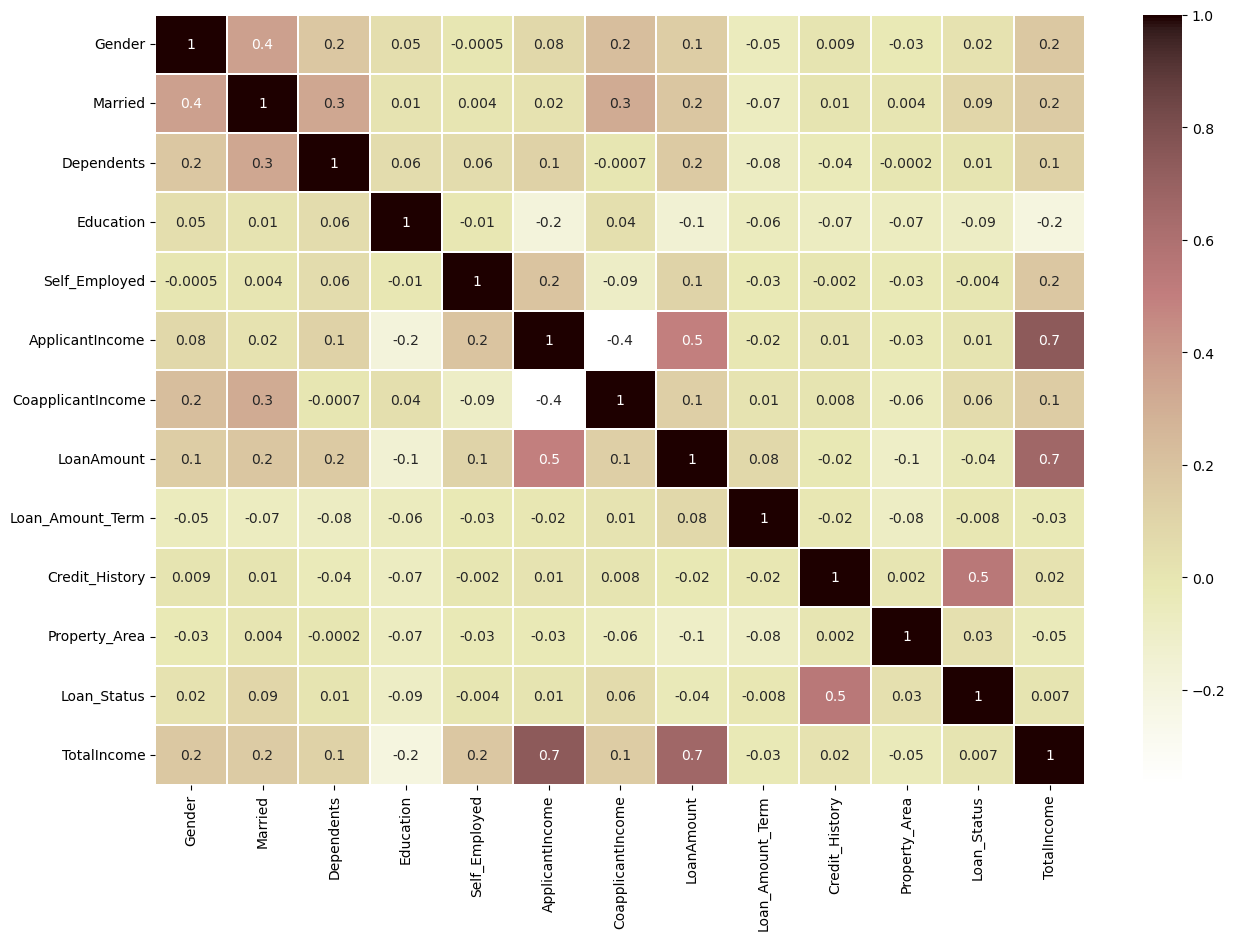

In [55]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "white", annot = True, cmap = "pink_r")
plt.yticks(rotation = 0);
plt.show()

*  **0-** no relation, 
* **-0.3 to +0.3** - less correlation, 

* **greater than -0.5 or greater than +0.5**- moderate correlation,

* greater than -0.7

The correlation matrix is represented in this heatmap, allowing for visual interpretation of the data. By examining the heatmap, we can discern the connections between features and both other features as well as the label. It should be noted that this heatmap displays both positive and negative correlations.

1. The column Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area and TotalIncome are positively correlated with the Label Column "Loan_Status" While
2. The label is negatively correlated with Education,Self_Employed,LoanAmount and the Loan_Amount_Term. 
3. Also the columns Self_Employed and Loan_Amount_Term have very low correlation with the label,hence we may drop them if need be.

In [56]:
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
CoapplicantIncome    0.060593
Property_Area        0.032112
Gender               0.017987
ApplicantIncome      0.010959
Dependents           0.010118
TotalIncome          0.007232
Self_Employed       -0.003700
Loan_Amount_Term    -0.008168
LoanAmount          -0.036339
Education           -0.085884
Name: Loan_Status, dtype: float64

As seen above, we can identify both positive and negative correlated features with the target variable.

**Visualizing the correlation between label and features using bar plot**

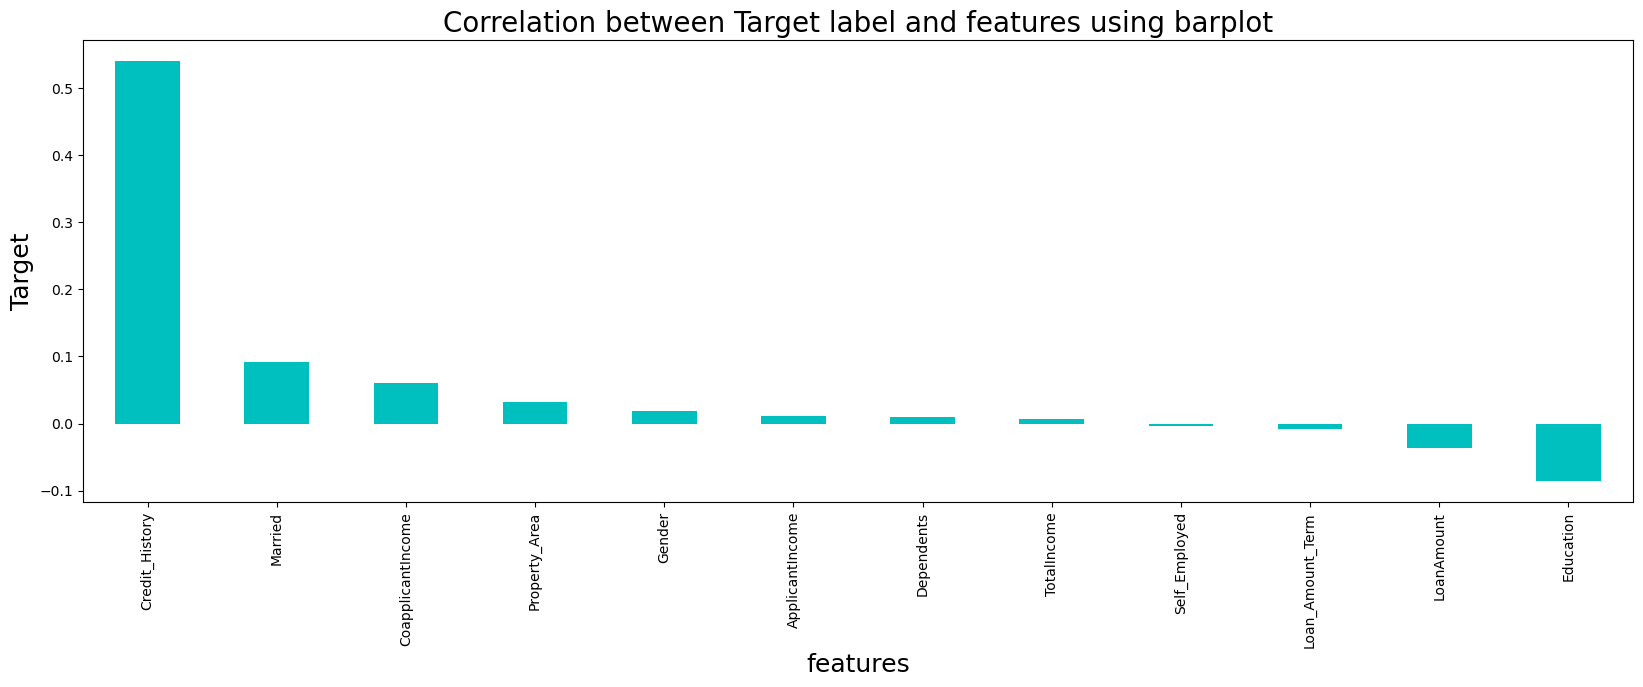

In [57]:
plt.figure(figsize = (20, 6))
df.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color="c")
plt.xlabel('features', fontsize = 18)
plt.ylabel('Target', fontsize = 18)
plt.title("Correlation between Target label and features using barplot", fontsize=20)
plt.show()

Based on the bar plot presented above, it is evident that there exists a positive and negative correlation between the features and the target variable. Specifically, the features **Self_Employed** and **Loan_Amount_Term** exhibit a minimal correlation with the column.

# Splitting the Data

**Separating Features and label**

In [58]:
x = df.drop("Loan_Status", axis =1)
y = df["Loan_Status"]

**Feature Scaling using standard scalarization**

In [59]:
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.516186,-1.107783,-0.138624,0.265985,0.411733,1.223298,0.008426
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.137806,0.782158,-0.008123,0.265985,0.411733,-1.318513,0.082860
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.519479,-1.107783,-1.343509,0.265985,0.411733,1.223298,-1.217299
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.751605,0.897526,-0.138624,0.265985,0.411733,1.223298,-0.301306
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.555727,-1.107783,0.187592,0.265985,0.411733,1.223298,0.055223
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.572062,-1.107783,-1.196800,0.265985,0.411733,-1.318513,-1.279531
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.032679,-1.107783,-2.344602,-1.964410,0.411733,-1.318513,-0.641164
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,1.015921,0.308483,1.372928,0.265985,0.411733,1.223298,0.653664
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.918972,-1.107783,0.759593,0.265985,0.411733,1.223298,0.485128


To address the problem of bias, we have used the Standard Scalarization method to scale the data.

**Checking Variance Inflation Factor(VIF)**

In [60]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.205561,Gender
1,1.399734,Married
2,1.176879,Dependents
3,1.079379,Education
4,1.051756,Self_Employed
5,4.731406,ApplicantIncome
6,2.437278,CoapplicantIncome
7,1.869382,LoanAmount
8,1.045973,Loan_Amount_Term
9,1.009626,Credit_History


As shown, there are no issues of multicolinearity in the data.

**Oversampling Method**

Solving the Issue of IMBALANCE using the Oversampling Method.

In [61]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In the above analysis, it is evident that the data is imbalanced. As this is a classification problem, we will address this issue by employing the oversampling method to balance the data.

In [62]:
# Oversampling the data 
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [63]:
# checking the value count of the target column once again
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [64]:
# Lets now balance the data
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now that we have a balanced dataset, it is now possible to construct machine learning models for classification purposes.

# The Machine Learning Model Training,Evaluation and Predictions

**Finding the best random state**

In [65]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    pred = rfc.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8622047244094488 at random_state 130


#### SPLIT INTO TRAIN AND TEST USING THE 70:30 RULE

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = maxRs)

### Ensemble Methods

**Random Forest Classifier**

In [67]:
# Checking the accuracy for RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
predrfc = rfc.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predrfc))
print("Classification Report for Random Forest Classifier: \n", classification_report(y_test, predrfc))
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(y_test, predrfc))

accuracy_score: 
 0.8582677165354331
Classification Report for Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       124
           1       0.84      0.90      0.87       130

    accuracy                           0.86       254
   macro avg       0.86      0.86      0.86       254
weighted avg       0.86      0.86      0.86       254

Confusion Matrix of Random Forest Classifier: 
 [[101  23]
 [ 13 117]]


**Gradient Boosting Classifier**

In [68]:
# Checking the accuracy for Gradient Boosting Classifier
Gb = GradientBoostingClassifier()
Gb.fit(x_train, y_train)
predGb = Gb.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predGb))
print("Classification Report for Gradient Boosting Classifier: \n", classification_report(y_test, predGb))
print("Confusion Matrix of Gradient Boosting Classifier: \n", confusion_matrix(y_test, predGb))

accuracy_score: 
 0.8464566929133859
Classification Report for Gradient Boosting Classifier: 
               precision    recall  f1-score   support

           0       0.92      0.75      0.83       124
           1       0.80      0.94      0.86       130

    accuracy                           0.85       254
   macro avg       0.86      0.84      0.84       254
weighted avg       0.86      0.85      0.84       254

Confusion Matrix of Gradient Boosting Classifier: 
 [[ 93  31]
 [  8 122]]


**AdaBooster Classifier**

In [69]:
# Checking the accuracy for AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(x_train, y_train)
predabc = abc.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predabc))
print("Classification Report for AdaBoost Classifier: \n", classification_report(y_test, predabc))
print("Confusion Matrix of AdaBoost Classifier: \n", confusion_matrix(y_test, predabc))

accuracy_score: 
 0.7598425196850394
Classification Report for AdaBoost Classifier: 
               precision    recall  f1-score   support

           0       0.84      0.63      0.72       124
           1       0.71      0.88      0.79       130

    accuracy                           0.76       254
   macro avg       0.78      0.76      0.75       254
weighted avg       0.78      0.76      0.76       254

Confusion Matrix of AdaBoost Classifier: 
 [[ 78  46]
 [ 15 115]]


### The Traditional Models

**Logistic Regression**

In [70]:
# Checking accuracy for Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
predlr = lr.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predlr))
print("Classification Report for Logistic Regression: \n", classification_report(y_test, predlr))
print("Confusion Matrix of Logistic Regression: \n", confusion_matrix(y_test, predlr))

accuracy_score: 
 0.7283464566929134
Classification Report for Logistic Regression: 
               precision    recall  f1-score   support

           0       0.91      0.49      0.64       124
           1       0.66      0.95      0.78       130

    accuracy                           0.73       254
   macro avg       0.79      0.72      0.71       254
weighted avg       0.78      0.73      0.71       254

Confusion Matrix of Logistic Regression: 
 [[ 61  63]
 [  6 124]]


**Decision Tree Classifier**

In [71]:
# Checking accuracy for Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
preddtree = dtree.predict(x_test)
print("accuracy_score: \n", accuracy_score(y_test, preddtree))
print("Classification Report for Decision Tree Classifier: \n", classification_report(y_test, preddtree))
print("Confusion Matrix of Decision Tree Classifier: \n", confusion_matrix(y_test, preddtree))

accuracy_score: 
 0.7755905511811023
Classification Report for Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       124
           1       0.80      0.75      0.77       130

    accuracy                           0.78       254
   macro avg       0.78      0.78      0.78       254
weighted avg       0.78      0.78      0.78       254

Confusion Matrix of Decision Tree Classifier: 
 [[99 25]
 [32 98]]


**support Vector Machine(SVC) Classifier**

In [72]:
# Checking for accuracy for support Vector Machine Classifier
svc = SVC(probability=True)
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
decision_function_scores = svc.decision_function(x_test)
print("accuracy_score: \n", accuracy_score(y_test, predsvc))
print("Classification Report for support Vector Machine Classifier: \n", classification_report(y_test, predsvc))
print("Confusion Matrix of support Vector Machine Classifier: \n", confusion_matrix(y_test, predsvc))

accuracy_score: 
 0.7322834645669292
Classification Report for support Vector Machine Classifier: 
               precision    recall  f1-score   support

           0       0.85      0.55      0.67       124
           1       0.68      0.91      0.78       130

    accuracy                           0.73       254
   macro avg       0.76      0.73      0.72       254
weighted avg       0.76      0.73      0.72       254

Confusion Matrix of support Vector Machine Classifier: 
 [[ 68  56]
 [ 12 118]]


**Cross Validation Score**

In [73]:
# checking cv score for Random Forest classifier
score = cross_val_score(rfc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predrfc)- score.mean())

[0.77235772 0.74796748 0.7804878  0.82113821 0.79508197]
0.783406637345062
Difference between Accuracy score and cross validation score is - 0.0748610791903711


In [74]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(Gb,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGb)- score.mean())

[0.75609756 0.73170732 0.7804878  0.80487805 0.81147541]
0.7769292283086766
Difference between Accuracy score and cross validation score is - 0.06952746460470927


In [75]:
# checking cv score for AdaBoost Classifier
score = cross_val_score(abc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predabc)- score.mean())

[0.7804878  0.75609756 0.77235772 0.82113821 0.80327869]
0.7866719978675197
Difference between Accuracy score and cross validation score is - -0.026829478182480382


In [76]:
# checking cv score for Logistic Regression
score = cross_val_score(lr,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predlr)- score.mean())

[0.81300813 0.7804878  0.7804878  0.85365854 0.81967213]
0.809462881514061
Difference between Accuracy score and cross validation score is - -0.08111642482114756


In [77]:
# checking cv score for Decision Tree Classifier
score = cross_val_score(dtree,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, preddtree)- score.mean())

[0.73170732 0.68292683 0.72357724 0.78861789 0.73770492]
0.732906837265094
Difference between Accuracy score and cross validation score is - 0.04268371391600834


In [78]:
# checking cv score for Support Vector Machine Classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predsvc)- score.mean())

[0.81300813 0.77235772 0.7804878  0.84552846 0.81967213]
0.8062108489937359
Difference between Accuracy score and cross validation score is - -0.07392738442680669


A higher cross-validation score generally indicates better model performance. Therefore, in this case, the "Random Forest Classifier" has the highest cross-validation score, making it the best performing model based on the outcome of the CV scores of each model.

Hence, The **Random Forest Classifier** is our best model.

**Hyper Parameter Tuning**

In [79]:
# Specifying the parameters for the Random Forest classifier
parameters = {'criterion' :['gini', 'entropy'],
              'random_state' :[10, 50, 100],
              'max_depth' :[0, 10, 20],
              'n_jobs' : [-2, -1, 1],
              'n_estimators' : [50, 100,200, 300]}

In [80]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

In [81]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [82]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 10}

In [83]:
rfc_model = RandomForestClassifier(criterion = 'gini', max_depth = 20, n_estimators = 300, n_jobs = -2, random_state = 100)
rfc_model.fit(x_train,y_train)
pred = rfc_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

85.8267716535433


**Plotting ROC and compare AUC for all the models used**

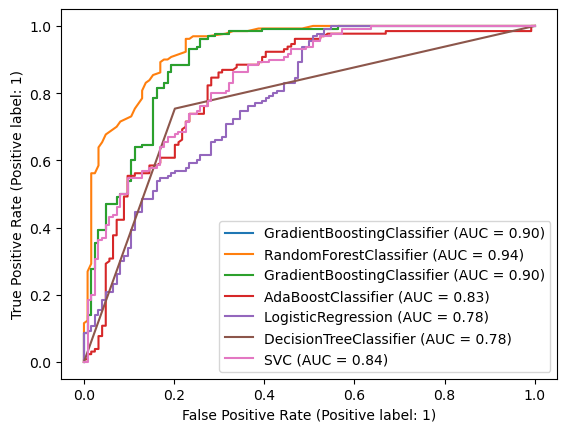

In [84]:
disp = plot_roc_curve(Gb,x_test,y_test)   # ax_ = Axes with confusion matrix
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(Gb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(lr, x_test, y_test, ax = disp.ax_)
plot_roc_curve(dtree, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)

plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

**Alternative method for ROC_AUC**

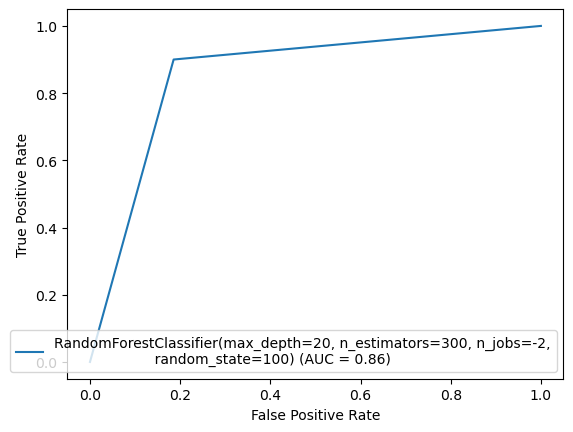

In [85]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=rfc_model)
display.plot()

Above is the ROC curve generated for the final model, and the AUC value for the most optimal model is 87%.

**Saving the Model**

In [86]:
# Saving the model using .pkl
joblib.dump(acc, "loan_prediction_Analysis.pki")

['loan_prediction_Analysis.pki']

**Predicting the saved model**

In [87]:
# Lets load the saved model and get the predictions
model = joblib.load("loan_prediction_Analysis.pki")

# prediction
prediction = rfc.predict(x_test)
prediction

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1])

These are the predicted **Loan_Status** of Applicants. 

In [88]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df

,predicted,original
0,0,0
1,0,1
2,1,1
3,1,1
4,0,0
...,...,...
249,1,0
250,1,1
251,0,1
252,0,0


### The Predictions

**Random Forest Classifier**

In [89]:
modelname = RandomForestClassifier()

In [90]:
# Training the rf model on the training data
modelname.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
# Make predictions on the test data
predictions = modelname.predict(x_test)

In [92]:
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})

In [93]:
# Creating a dictionary with the data
data = {
    'Predicted': modelname.predict(x_test),
    'Original': y_test
}

In [94]:
# Creating a DataFrame from the data dictionary
conclusion = pd.DataFrame(data)

In [95]:
# Creating a DataFrame with predicted and original values, using columns
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})
print(conclusion)

     Predicted  Original
643          0         0
89           0         1
101          1         1
361          1         1
162          0         0
..         ...       ...
284          1         0
320          1         1
473          0         1
489          0         0
193          1         1

[254 rows x 2 columns]
